In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [2]:
images: List[np.ndarray] = [
    cv2.imread('data/fontanna1.jpg', cv2.IMREAD_GRAYSCALE), 
    cv2.imread('data/fontanna2.jpg', cv2.IMREAD_GRAYSCALE),
    cv2.imread('data/budynek1.jpg', cv2.IMREAD_GRAYSCALE),
    cv2.imread('data/budynek2.jpg', cv2.IMREAD_GRAYSCALE),
    cv2.imread('data/eiffel1.jpg', cv2.IMREAD_GRAYSCALE),
    cv2.imread('data/eiffel2.jpg', cv2.IMREAD_GRAYSCALE),
]

In [3]:
def process_pair_SIFT(
        image_1: np.ndarray,
        image_2: np.ndarray,
        threshold: float = 0.5,
) -> None:
    detector = cv2.SIFT_create()
    matcher = cv2.BFMatcher()
    
    p1, d1 = detector.detectAndCompute(image_1, None)
    p2, d2 = detector.detectAndCompute(image_2, None)

    best_matches = [ [m] for m,n in matcher.knnMatch(d1, d2, k=2) if m.distance < threshold*n.distance]
    img = cv2.drawMatchesKnn(image_1, p1, image_2, p2, best_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

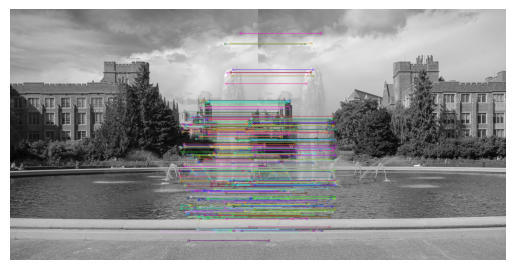

In [4]:
process_pair_SIFT(images[0], images[1])

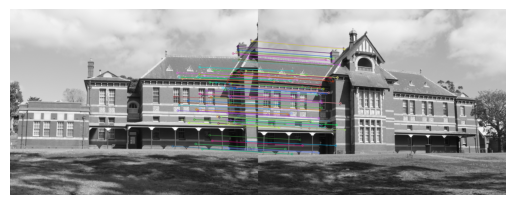

In [5]:
process_pair_SIFT(images[2], images[3], 0.2)

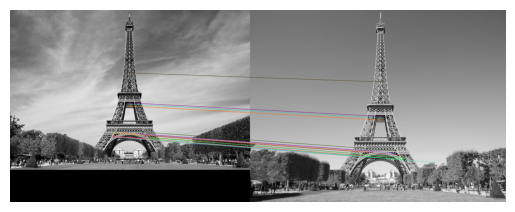

In [6]:
process_pair_SIFT(images[4], images[5])